<a href="https://colab.research.google.com/github/Lfernanda-lopez/TA-Introduccion-a-la-ciencia-de-datos-/blob/main/Trabajo_de_acompa%C3%B1amiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Precios_Medicamentos_20250224.csv to Precios_Medicamentos_20250224.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('Precios_Medicamentos_20250224.csv')
print(df.head())

  principio_activo unidad_de_dispensacion              concentracion  \
0        Midazolam                Ampolla            Midazolam 15 mg   
1  Acido Valproico                Tableta  Divalproato Sodico 500 mg   
2  Acido Valproico                Tableta  Divalproato Sodico 500 mg   
3       Fluoxetina                Capsula           Fluoxetina 20 mg   
4   Proximetacaina                 Frasco        Proximetacaina 5 mg   

  unidad_base nombre_comercial fabricante  precio_por_tableta factoresprecio  \
0          ml         Dormicum  Siegfried        11199.800000           Alto   
1          mg          Valcote  Lafrancol         3752.866667          Medio   
2          mg          Valcote  Lafrancol         1777.266522          Medio   
3          mg       Fluoxetina     Genfar          329.295281          Medio   
4          ml          Alcaine      Alcon        64184.745760          Medio   

   numerofactor  
0             3  
1             2  
2             2  
3             

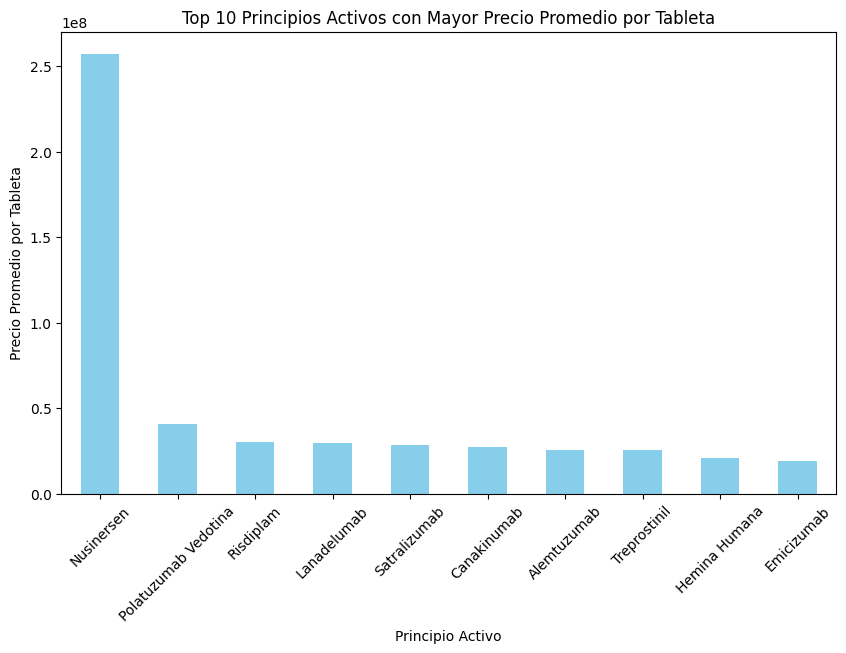

In [ ]:

df = pd.read_csv('Precios_Medicamentos_20250224.csv')

precio_promedio = df.groupby('principio_activo')['precio_por_tableta'].mean()


top_10 = precio_promedio.nlargest(10)

top_10.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Top 10 Principios Activos con Mayor Precio Promedio por Tableta')
plt.xlabel('Principio Activo')
plt.ylabel('Precio Promedio por Tableta')
plt.xticks(rotation=45)
plt.show()

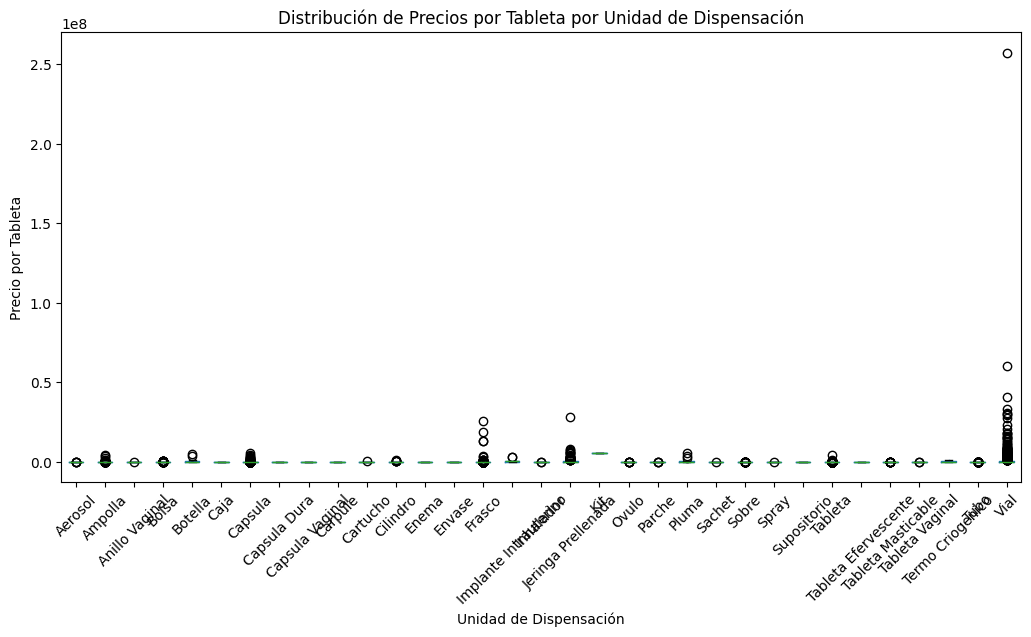

In [ ]:
df = pd.read_csv('Precios_Medicamentos_20250224.csv')

df.boxplot(column='precio_por_tableta', by='unidad_de_dispensacion', figsize=(12, 6), grid=False)
plt.title('Distribución de Precios por Tableta por Unidad de Dispensación')
plt.suptitle('')
plt.xlabel('Unidad de Dispensación')
plt.ylabel('Precio por Tableta')
plt.xticks(rotation=45)
plt.show()

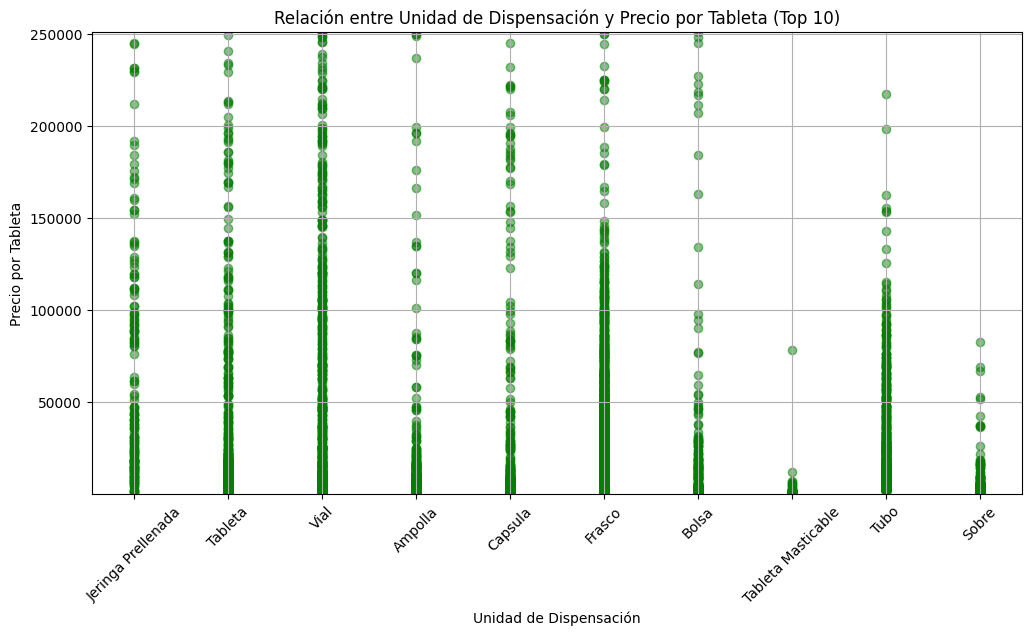

In [ ]:
df = pd.read_csv('Precios_Medicamentos_20250224.csv')
muestra = df.sample(n=12500, random_state=42)
top_10_unidades = muestra['unidad_de_dispensacion'].value_counts().nlargest(10).index
muestra_filtrada = muestra[muestra['unidad_de_dispensacion'].isin(top_10_unidades)]

plt.figure(figsize=(12, 6))
plt.scatter(muestra_filtrada['unidad_de_dispensacion'], muestra_filtrada['precio_por_tableta'], alpha=0.5, color='green')
plt.title('Relación entre Unidad de Dispensación y Precio por Tableta (Top 10)')
plt.xlabel('Unidad de Dispensación')
plt.ylabel('Precio por Tableta')
plt.grid(True)
plt.xticks(rotation=45)
plt.ylim(muestra_filtrada['precio_por_tableta'].min(), muestra_filtrada['precio_por_tableta'].quantile(0.95))
plt.show()

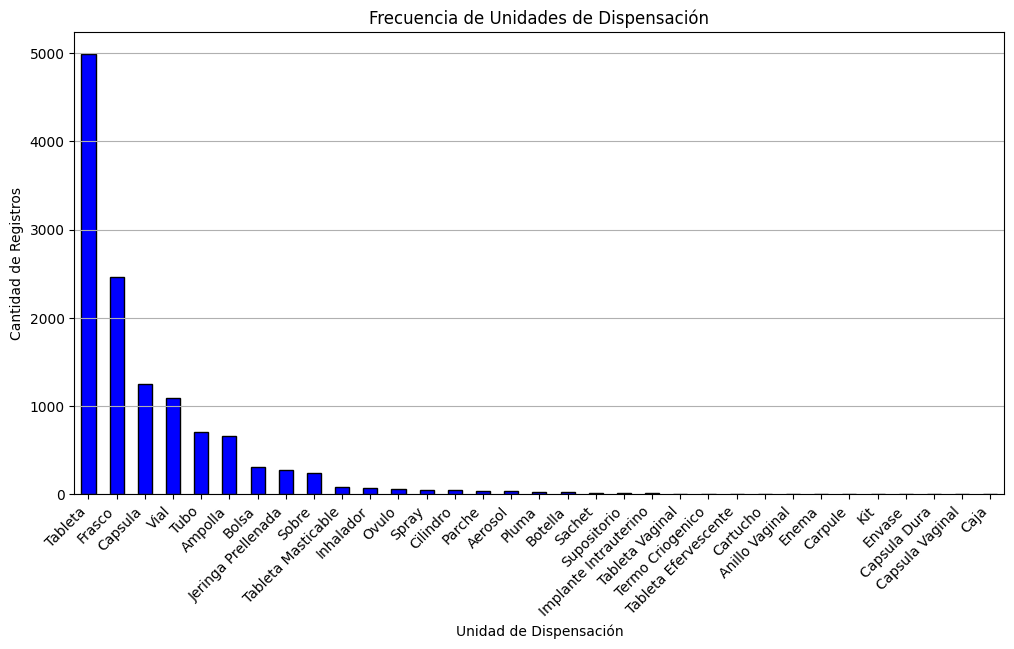

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Precios_Medicamentos_20250224.csv')

plt.figure(figsize=(12, 6))
df['unidad_de_dispensacion'].value_counts().plot(kind='bar', color='b', edgecolor='black')

plt.title('Frecuencia de Unidades de Dispensación')
plt.xlabel('Unidad de Dispensación')
plt.ylabel('Cantidad de Registros')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

plt.show()




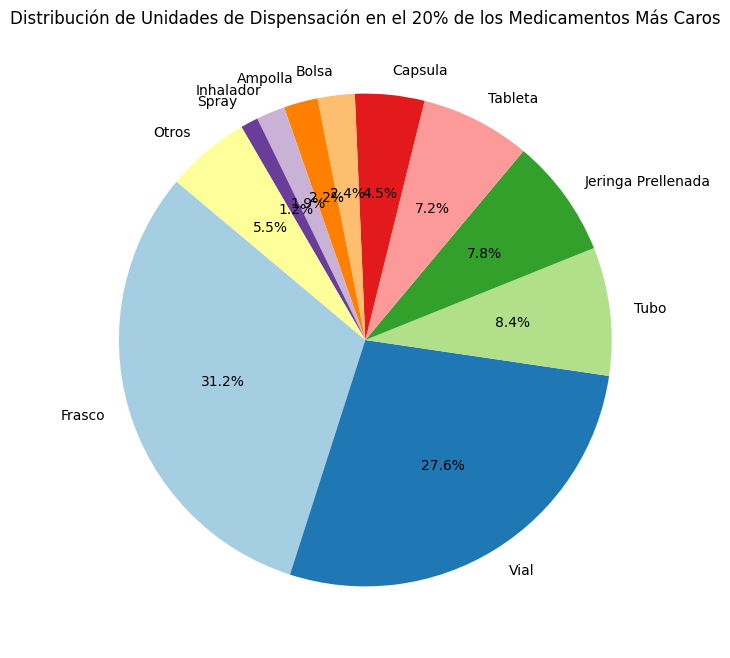

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Precios_Medicamentos_20250224.csv')
df_top = df.nlargest(int(len(df) * 0.2), 'precio_por_tableta')
unidad_counts = df_top['unidad_de_dispensacion'].value_counts()

top_10 = unidad_counts.nlargest(10)
otros = unidad_counts.iloc[10:].sum()

labels = list(top_10.index) + ['Otros']
sizes = list(top_10.values) + [otros]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=plt.cm.Paired.colors, startangle=140)

plt.title('Distribución de Unidades de Dispensación en el 20% de los Medicamentos Más Caros')
plt.show()


<ipython-input-62-5a635757d143>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['x'] = df_filtrado['principio_activo'].astype('category').cat.codes
<ipython-input-62-5a635757d143>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['y'] = np.arange(len(df_filtrado))


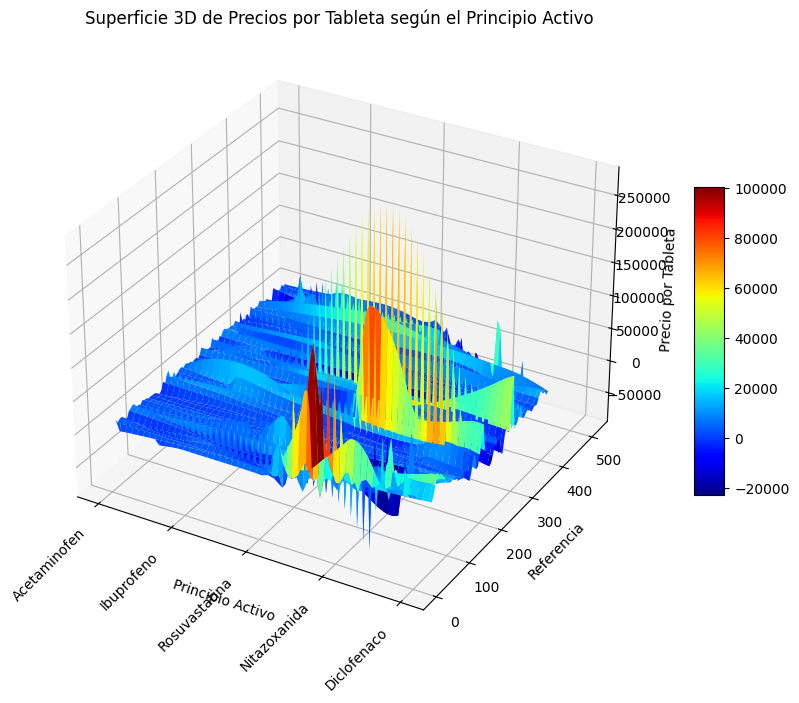

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

df = pd.read_csv('Precios_Medicamentos_20250224.csv')

principios_activos = df['principio_activo'].value_counts().nlargest(5).index
df_filtrado = df[df['principio_activo'].isin(principios_activos)]

df_filtrado['x'] = df_filtrado['principio_activo'].astype('category').cat.codes
df_filtrado['y'] = np.arange(len(df_filtrado))

x = df_filtrado['x'].values
y = df_filtrado['y'].values
z = df_filtrado['precio_por_tableta'].values

xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)
zi = griddata((x, y), z, (xi, yi), method='cubic')

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(xi, yi, zi, cmap='jet', edgecolor='none')

ax.set_xticks(range(len(principios_activos)))
ax.set_xticklabels(principios_activos, rotation=45, ha='right')
ax.set_xlabel('Principio Activo')
ax.set_ylabel('Referencia')
ax.set_zlabel('Precio por Tableta')

fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)

plt.title('Superficie 3D de Precios por Tableta según el Principio Activo')
plt.show()





In [ ]:
import pandas as pd

df = pd.read_csv('Precios_Medicamentos_20250224.csv')

resumen_fabricantes = df.groupby('fabricante')['precio_por_tableta'].agg(['mean', 'std', 'min', 'max']).reset_index()
print(resumen_fabricantes)

         fabricante      mean        std     min        max
0            Abbott   6348.03     787.30 5088.00    6977.19
1            Abbvie 345143.73 1066725.69 1614.31 7366807.57
2         Actifarma   3834.07    6527.70    4.87   17920.00
3             Adare   7217.96    1396.81 6230.27    8205.65
4             Adexa   7135.89   10642.27 1437.10   38962.72
..              ...       ...        ...     ...        ...
449        Winthrop   1211.98    1814.99   15.15    8289.56
450          Worwag   2554.81    1893.99  890.70    4649.52
451  Xinetix Pharma  93481.37  177406.23  869.78  772558.82
452          Zambon  12216.29   11366.25  895.67   47611.00
453      Zonepharma  54911.58   56793.68 7148.01  120298.29

[454 rows x 5 columns]


In [ ]:
top_fabricantes = df.groupby('fabricante')['precio_por_tableta'].mean().nlargest(10).round(2)
print(top_fabricantes)



fabricante
Biogen                    44090322.17
Itm Medical               17728394.12
Ferrer                     9815778.85
Curium Netherlands         6957500.00
Lantheus Medical           5539897.00
Soreq                      5539897.00
Recordati Rare Diseases    5524973.55
Roche                      5245882.39
Genzyme                    5083138.34
Lfb                        4269957.72
Name: precio_por_tableta, dtype: float64


In [ ]:
cantidad_por_unidad = df['unidad_de_dispensacion'].value_counts()
print(cantidad_por_unidad)


unidad_de_dispensacion
Tableta                  4984
Frasco                   2464
Capsula                  1248
Vial                     1096
Tubo                      705
Ampolla                   657
Bolsa                     310
Jeringa Prellenada        275
Sobre                     248
Tableta Masticable         81
Inhalador                  68
Ovulo                      67
Spray                      56
Cilindro                   49
Parche                     39
Aerosol                    37
Pluma                      27
Botella                    25
Sachet                     18
Supositorio                15
Implante Intrauterino      13
Tableta Vaginal            11
Termo Criogenico            8
Tableta Efervescente        7
Cartucho                    6
Anillo Vaginal              5
Enema                       3
Carpule                     3
Kit                         2
Envase                      2
Capsula Dura                2
Capsula Vaginal             2
Caja             

In [ ]:
fabricantes_var = df.groupby('fabricante')['precio_por_tableta'].std().nlargest(10)
fabricantes_var = fabricantes_var.apply(lambda x: f"{x:,.2f}")
print(fabricantes_var)



fabricante
Biogen                     104,374,127.67
Ferrer                      17,896,088.77
Roche                        9,925,450.26
Genzyme                      7,682,702.42
Recordati Rare Diseases      7,367,672.01
Baxalta                      4,980,486.05
Bristol Myers Squibb         3,039,000.97
Mundipharma                  2,660,609.16
Lfb                          2,644,415.01
Janssen                      2,422,220.14
Name: precio_por_tableta, dtype: object


In [ ]:
resumen_unidades = df.groupby('unidad_de_dispensacion')['precio_por_tableta'].describe()

pd.options.display.float_format = '{:,.2f}'.format

print(resumen_unidades)


                          count         mean          std          min  \
unidad_de_dispensacion                                                   
Aerosol                   37.00    45,863.45    67,293.75     3,920.91   
Ampolla                  657.00    35,588.52   262,006.33         2.86   
Anillo Vaginal             5.00    61,608.37     8,623.54    48,822.94   
Bolsa                    310.00    42,161.31   113,411.34        23.58   
Botella                   25.00   655,115.56 1,247,500.13     1,835.83   
Caja                       1.00    30,734.76          NaN    30,734.76   
Capsula                1,248.00    44,993.76   305,543.31         1.38   
Capsula Dura               2.00     2,657.00         0.00     2,657.00   
Capsula Vaginal            2.00     8,959.89     1,446.75     7,936.88   
Carpule                    3.00     2,177.91     2,058.98       881.96   
Cartucho                   6.00   130,926.00   242,798.08       898.30   
Cilindro                  49.00   124,

In [ ]:
import numpy as np
factores = df['numerofactor'].dropna().to_numpy()
valores_unicos, conteo = np.unique(factores, return_counts=True)

for valor, cantidad in zip(valores_unicos, conteo):
    print(f"Factor {valor}: {cantidad} ocurrencias")

Factor 1: 2720 ocurrencias
Factor 2: 7086 ocurrencias
Factor 3: 2728 ocurrencias


In [ ]:
fabricante_precios = df.groupby('fabricante')['precio_por_tableta'].apply(lambda x: np.mean(x.dropna()))
print(fabricante_precios)


fabricante
Abbott              6348.030122
Abbvie            345143.731470
Actifarma           3834.070258
Adare               7217.960429
Adexa               7135.891086
                      ...      
Winthrop            1211.979724
Worwag              2554.812185
Xinetix Pharma     93481.368041
Zambon             12216.288173
Zonepharma         54911.575788
Name: precio_por_tableta, Length: 454, dtype: float64


In [ ]:
unidad_precios = df.groupby('unidad_de_dispensacion')['precio_por_tableta'].agg([np.min, np.max]).round(2)
print(unidad_precios)


                              min          max
unidad_de_dispensacion                        
Aerosol                   3920.91    305559.71
Ampolla                      2.86   4661111.11
Anillo Vaginal           48822.94     72256.00
Bolsa                       23.58    966000.00
Botella                   1835.83   5363225.81
Caja                     30734.76     30734.76
Capsula                      1.38   5897578.11
Capsula Dura              2657.00      2657.00
Capsula Vaginal           7936.88      9982.89
Carpule                    881.96      4552.09
Cartucho                   898.30    616584.00
Cilindro                  2222.76   1464993.86
Enema                    23787.69     42531.33
Envase                    7212.24     12758.79
Frasco                      13.69  25625860.32
Implante Intrauterino    90837.00   3152204.69
Inhalador                 3741.58    278470.67
Jeringa Prellenada         911.93  28343280.00
Kit                    5539897.00   5539897.00
Ovulo        

<ipython-input-20-ead6f2d00c6f>:1: FutureWarning: The provided callable <function min at 0x7d91cb7598a0> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  unidad_precios = df.groupby('unidad_de_dispensacion')['precio_por_tableta'].agg([np.min, np.max]).round(2)
<ipython-input-20-ead6f2d00c6f>:1: FutureWarning: The provided callable <function max at 0x7d91cb759760> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  unidad_precios = df.groupby('unidad_de_dispensacion')['precio_por_tableta'].agg([np.min, np.max]).round(2)


In [ ]:
pd.options.display.float_format = '{:.2f}'.format

precios_unidad = df.groupby('unidad_de_dispensacion')['precio_por_tableta'].agg(['mean', 'std']).dropna()
print(precios_unidad)

mediana_principio = df.groupby('principio_activo')['precio_por_tableta'].median().dropna()
print(mediana_principio)

suma_factores = df.groupby('fabricante')['factoresprecio'].sum().dropna()
print(suma_factores)

conteo_productos = df['nombre_comercial'].value_counts()
print(conteo_productos)

factores = df[['numerofactor', 'precio_por_tableta']].dropna().to_numpy()
correlacion = np.corrcoef(factores[:, 0], factores[:, 1])[0, 1]
print(f"{correlacion:.2f}")


                             mean        std
unidad_de_dispensacion                      
Aerosol                  45863.45   67293.75
Ampolla                  35588.52  262006.33
Anillo Vaginal           61608.37    8623.54
Bolsa                    42161.31  113411.34
Botella                 655115.56 1247500.13
Capsula                  44993.76  305543.31
Capsula Dura              2657.00       0.00
Capsula Vaginal           8959.89    1446.75
Carpule                   2177.91    2058.98
Cartucho                130926.00  242798.08
Cilindro                124788.49  269466.74
Enema                    35992.47   10578.66
Envase                    9985.51    3922.01
Frasco                   66881.32  756829.68
Implante Intrauterino   744638.50 1074535.59
Inhalador                65391.15   54010.34
Jeringa Prellenada      658634.31 2063325.96
Kit                    5539897.00       0.00
Ovulo                    16325.14   42578.09
Parche                   15495.37   14102.00
Pluma     

In [ ]:
matriz_precios = np.random.choice(df['precio_por_tableta'].dropna(), (100, 100))
matriz_precios = np.round(matriz_precios, 2)
U, S, Vt = np.linalg.svd(matriz_precios)
print(f"Valores singulares principales: {np.round(S[:5], 2)}")

Valores singulares principales: [49555456.83 45664465.03 41413833.25 33333158.45 23774456.38]


In [ ]:
mediana_precio = df.groupby('principio_activo')['precio_por_tableta'].median()
print("Mediana del precio por tableta por principio activo:")
print(mediana_precio.head())

Mediana del precio por tableta por principio activo:
principio_activo
Abacavir                  21051.895651
Abacavir + Lamivudina      1317.120376
Abacavir Y Lamivudina      1318.833308
Abatacept                882917.500000
Abemaciclib              149278.132700
Name: precio_por_tableta, dtype: float64


In [ ]:
pd.options.display.float_format = '{:.2f}'.format

desviacion_precio = df.groupby('fabricante')['precio_por_tableta'].std()
print("Desviación estándar del precio por tableta por laboratorio:")
print(desviacion_precio.head())

Desviación estándar del precio por tableta por laboratorio:
fabricante
Abbott          787.30
Abbvie      1066725.69
Actifarma      6527.70
Adare          1396.81
Adexa         10642.27
Name: precio_por_tableta, dtype: float64


In [ ]:
precio_min = np.min(df['precio_por_tableta'])
precio_max = np.max(df['precio_por_tableta'])
print(f"Precio mínimo: {precio_min:.2f}, Precio máximo: {precio_max:.2f}")


Precio mínimo: 0.09, Precio máximo: 257103178.00


In [ ]:
varianza_precio = np.var(df['precio_por_tableta'], ddof=1)
print(f"Varianza del precio por tableta: {varianza_precio}")

Varianza del precio por tableta: 6775648148221.965
